# 6.2 Exploring relationships

### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Data Cleaning
#### 3. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots

### 1. Importing Visualization Libraries and Data

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [17]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [18]:
# Define path

path = r"/Users/balachandark/Desktop/Achievement 6"

In [19]:
# Import data

df = pd.read_csv(os.path.join(path, 'Cleaned Data', 'clean_clv_data.csv'))

### 2. Data Cleaning

#### Renaming Columns:

In [22]:
df.shape

(9134, 25)

In [23]:
df.columns

Index(['Unnamed: 0', 'customer_id', 'state', 'customer_lifetime_value',
       'response', 'coverage', 'education', 'effective_to_date',
       'employment_status', 'gender', 'income', 'region', 'marital_status',
       'monthly_premium', 'months_since_last_claim',
       'months_since_policy_inception', 'no_of_open_complaints',
       'no_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [24]:
# Rename columns whose names are too long

df.rename(columns = {'months_since_policy_inception' : 'months_sp_incep', 'months_since_last_claim': 'ms_last_claim', 
                     'no_of_open_complaints': 'no_open_comp'},
                      inplace = True)

In [25]:
df.dtypes

Unnamed: 0                   int64
customer_id                 object
state                       object
customer_lifetime_value    float64
response                    object
coverage                    object
education                   object
effective_to_date           object
employment_status           object
gender                      object
income                       int64
region                      object
marital_status              object
monthly_premium              int64
ms_last_claim                int64
months_sp_incep              int64
no_open_comp                 int64
no_of_policies               int64
policy_type                 object
policy                      object
renew_offer_type            object
sales_channel               object
total_claim                float64
vehicle_class               object
vehicle_size                object
dtype: object

In [26]:
df.head()

,Unnamed: 0,customer_id,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,...,months_sp_incep,no_open_comp,no_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim,vehicle_class,vehicle_size
0,0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-03-02,Employed,M,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


#### Missing Values Check:

In [28]:
# Check for missing values

df.isnull().sum() # No missing values!

Unnamed: 0                 0
customer_id                0
state                      0
customer_lifetime_value    0
response                   0
coverage                   0
education                  0
effective_to_date          0
employment_status          0
gender                     0
income                     0
region                     0
marital_status             0
monthly_premium            0
ms_last_claim              0
months_sp_incep            0
no_open_comp               0
no_of_policies             0
policy_type                0
policy                     0
renew_offer_type           0
sales_channel              0
total_claim                0
vehicle_class              0
vehicle_size               0
dtype: int64

#### Duplicates Check:

In [30]:
# Find duplicates

df_dups = df[df.duplicated()]

In [31]:
df_dups.shape # No duplicates!

(0, 25)

#### Mixed-Type Data:

In [33]:
for col in df.columns.tolist():
    weird = (df[col].apply(type) != type(df[col].iloc[0])).any()
    if weird:
        print(col)
    else: 
        print('There is no mixed-type data')
        
# No mixed-type columns either!

Unnamed: 0
There is no mixed-type data
There is no mixed-type data
customer_lifetime_value
There is no mixed-type data
There is no mixed-type data
There is no mixed-type data
There is no mixed-type data
There is no mixed-type data
There is no mixed-type data
income
There is no mixed-type data
There is no mixed-type data
monthly_premium
ms_last_claim
months_sp_incep
no_open_comp
no_of_policies
There is no mixed-type data
There is no mixed-type data
There is no mixed-type data
There is no mixed-type data
total_claim
There is no mixed-type data
There is no mixed-type data


#### I find that the code says that there are mixed data types.However, there are none when I looked at the raw file after I saved it to CSV from previous exercise. Further, I tried my best to sort the code with the help of ChatGPT as well. However, it is not working

In [35]:
df.dtypes

Unnamed: 0                   int64
customer_id                 object
state                       object
customer_lifetime_value    float64
response                    object
coverage                    object
education                   object
effective_to_date           object
employment_status           object
gender                      object
income                       int64
region                      object
marital_status              object
monthly_premium              int64
ms_last_claim                int64
months_sp_incep              int64
no_open_comp                 int64
no_of_policies               int64
policy_type                 object
policy                      object
renew_offer_type            object
sales_channel               object
total_claim                float64
vehicle_class               object
vehicle_size                object
dtype: object

### 3. Exploring Relationships

### Correlations:

In [38]:
## Removing columns that are not meaningful for correlations

df_temp = df.drop(columns = ['Unnamed: 0', 'customer_id', 'state', 'coverage', 'effective_to_date', 'response', 'employment_status', 'education', 'gender', 'region',
                             'marital_status', 'policy_type', 'policy', 'renew_offer_type',
                             'sales_channel', 'vehicle_class', 'vehicle_size'], axis=1)

df_temp = df_temp.select_dtypes(include=['number'])

In [39]:
df_temp.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium', 'ms_last_claim',
       'months_sp_incep', 'no_open_comp', 'no_of_policies', 'total_claim'],
      dtype='object')

In [40]:
# Create a correlation matrix using pandas

df_temp.corr()

,customer_lifetime_value,income,monthly_premium,ms_last_claim,months_sp_incep,no_open_comp,no_of_policies,total_claim
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
ms_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_sp_incep,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
no_open_comp,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
no_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


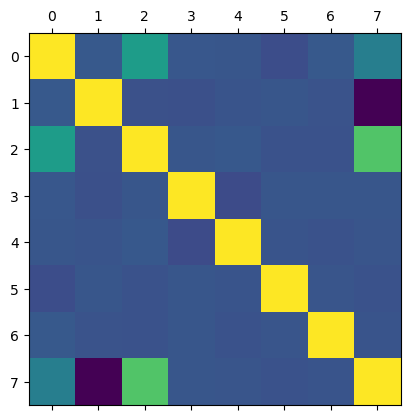

In [41]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_temp.corr())
plt.show()

In [42]:
# Save figure
plt.matshow(df_temp.corr())
plt.savefig(os.path.join(path, 'Visuals', 'corr_out.png')) 

# This will save the image in the working directory. 
#If you don't know what this directory is the next line will show you how to check

In [43]:
#current dir
cwd = os.getcwd()
cwd

'/Users/balachandark/Desktop/Achievement 6/Scripts'

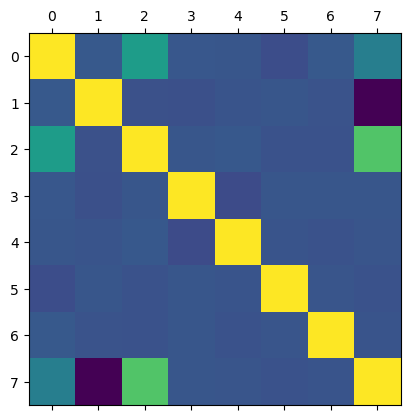

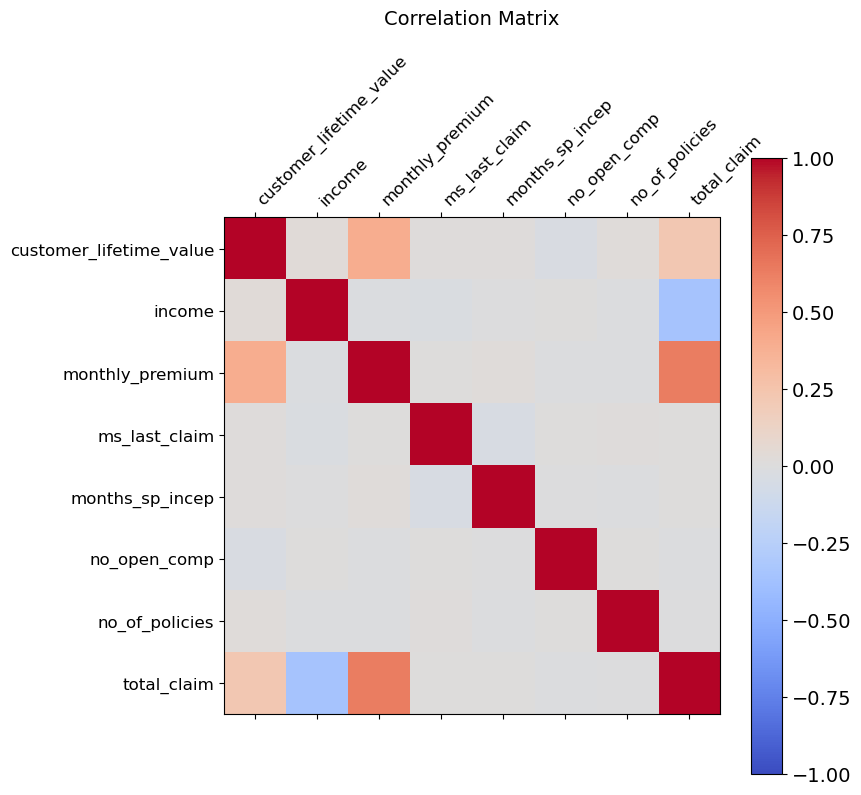

In [44]:
# Add labels, a legend, and change the size of the heatmap
# Ensure df_temp has only numeric columns and drop columns with all NaN
df_temp = df_temp.select_dtypes(include=['number']).dropna(axis=1, how='all')

# Compute correlation matrix, replacing NaN with 0
corr_matrix = df_temp.corr().fillna(0)

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 8))  # Set figure size

# Plot the heatmap using matshow
cax = ax.matshow(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)  # Color scale

# Add colorbar
cb = plt.colorbar(cax)
cb.ax.tick_params(labelsize=14)

# Set axis ticks and labels
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, fontsize=12, rotation=45, ha="left")
ax.set_yticklabels(corr_matrix.columns, fontsize=12)

# Add title
plt.title("Correlation Matrix", fontsize=14, pad=20)

plt.show()


#### Create a correlation heatmap using seaborn:

In [46]:
df_temp.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium', 'ms_last_claim',
       'months_sp_incep', 'no_open_comp', 'no_of_policies', 'total_claim'],
      dtype='object')

In [47]:
# Create a subset excluding the "Date" and "No" columns

sub = df_temp

In [48]:
sub

,customer_lifetime_value,income,monthly_premium,ms_last_claim,months_sp_incep,no_open_comp,no_of_policies,total_claim
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


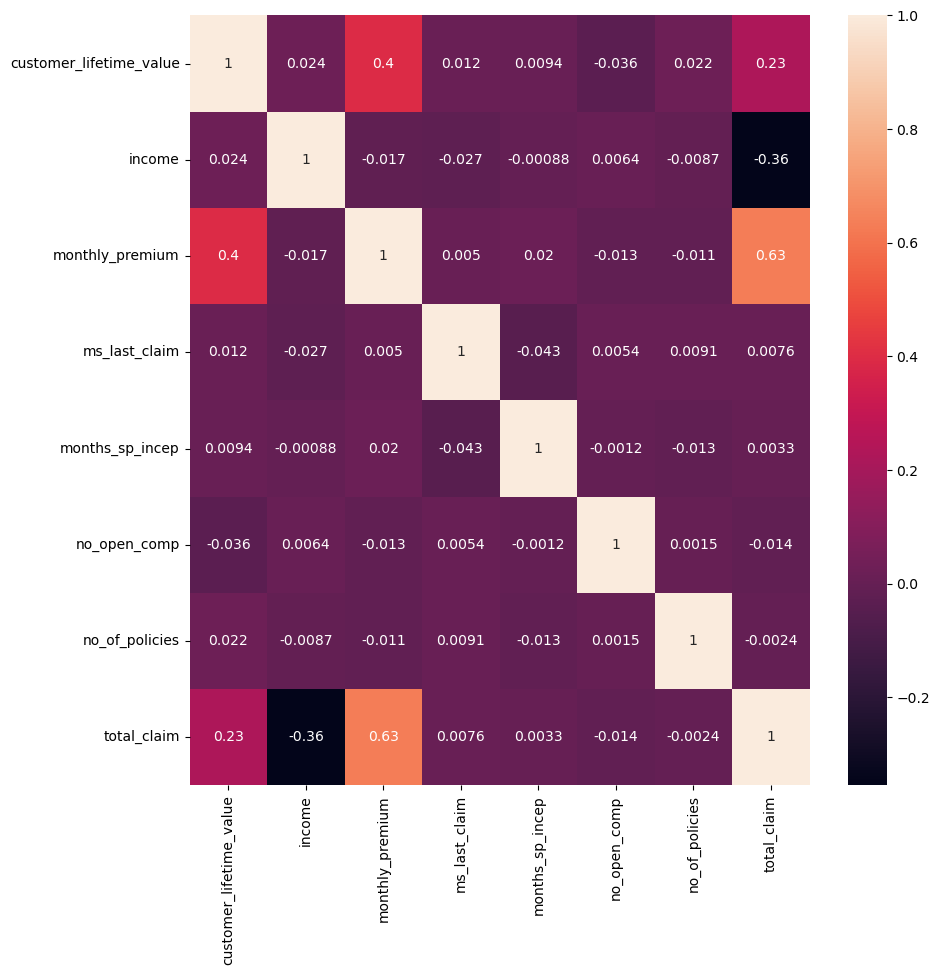

In [49]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.
plt.show()

## Comments:

##### There is high positive correlation between the total claim and the monthly premium. Additionally, there is a weak positive correlation between customer lifetime value and total claim. 
##### Further, there is weak negative correlation between income and total claim. 

### Scatterplots:

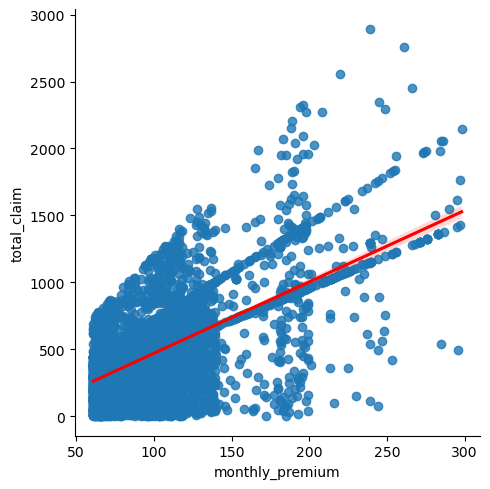

In [81]:
# Create a scatterplot for the "house age" and "price per unit" columns in seaborn
sns.lmplot(x = 'monthly_premium', y = 'total_claim', line_kws={'color':'red'}, data = df)
plt.show()

## Comments

##### The scatter plot shows that there is a linear relationship between the monthly premium and total claim. 
##### With increase in the monthly premium paid the total claim increases. However, only a appropriate regression analysis can reveal with this relationship is statistically significant.


### Pair Plots:

In [343]:
# Keep only the variables you want to use in the pair plot

sub_2 = sub[['customer_lifetime_value', 'monthly_premium', 'no_of_policies', 'total_claim']]


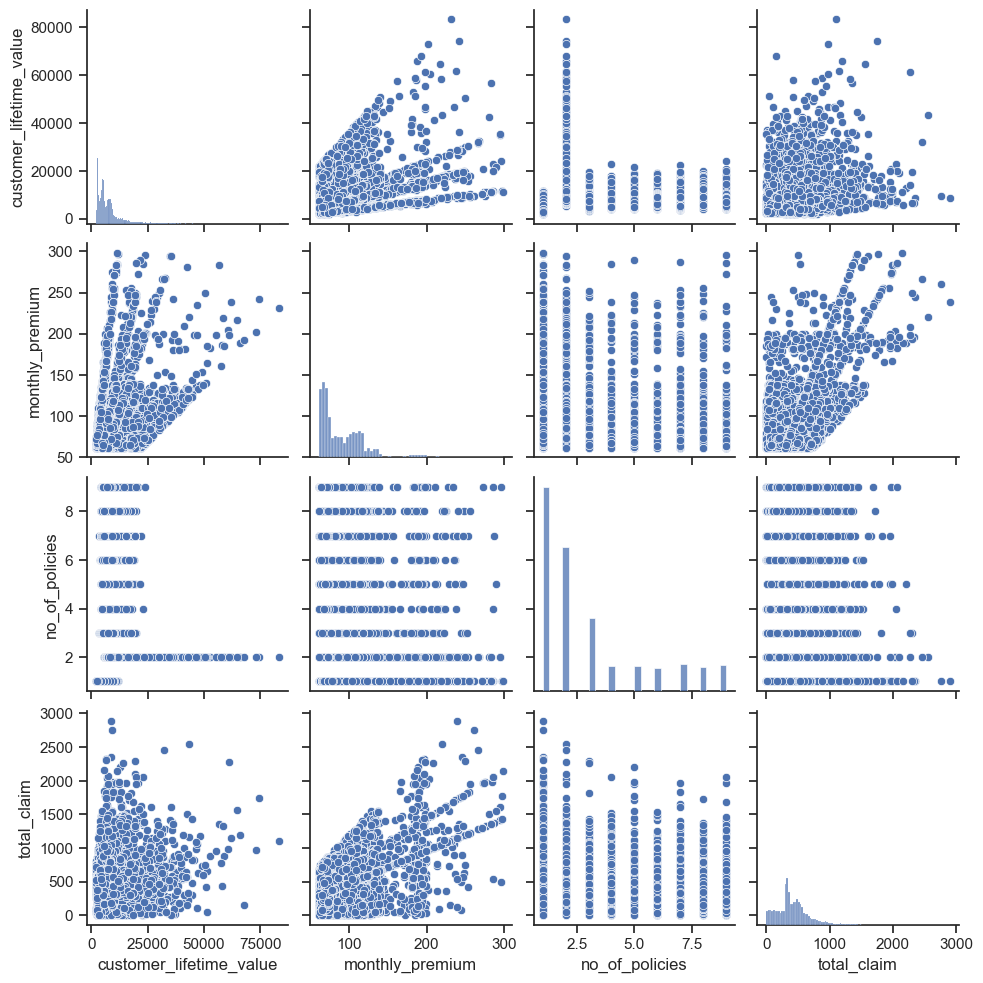

In [354]:
# Create a pair plot 

g = sns.pairplot(sub_2)
plt.show()

## Comments

### Total claim & Customer Lifetime Value: 
#### It appears that there is no clear relationship between the customer lifetime value and the total claim

### Total claim & Monthly Premium
#### There is a positive correlation between total claim and monthly premium

### Total claim & No of Policies
#### Since no of policies is an integer it is hard to predict the relationship. However, looking at the graph one can say that the total claim goes down with increase in the number of policies.

### Categorical Plots:

##### Creating a categorical variable that splits the "Price per Unit" column into categories

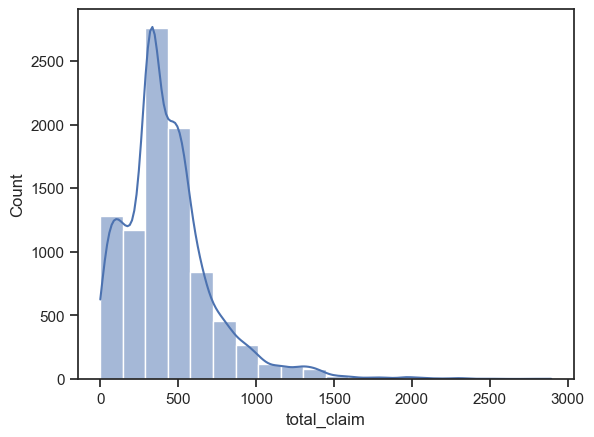

In [88]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df['total_claim'], bins = 20, kde = True)
plt.show()

In [90]:
df.loc[df['total_claim'] < 500, 'total_claim_category'] = 'Low claim'

In [92]:
df.loc[(df['total_claim'] >= 500) & (df['total_claim'] < 1500), 'total_claim_category'] = 'Moderate claim'

In [94]:
df.loc[df['total_claim'] >= 1500, 'total_claim_category'] = 'High claim'

In [96]:
df['total_claim_category'].value_counts(dropna = False)

total_claim_category
Low claim         6189
Moderate claim    2879
High claim          66
Name: count, dtype: int64

In [98]:
df.columns

Index(['Unnamed: 0', 'customer_id', 'state', 'customer_lifetime_value',
       'response', 'coverage', 'education', 'effective_to_date',
       'employment_status', 'gender', 'income', 'region', 'marital_status',
       'monthly_premium', 'ms_last_claim', 'months_sp_incep', 'no_open_comp',
       'no_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim', 'vehicle_class', 'vehicle_size',
       'total_claim_category'],
      dtype='object')

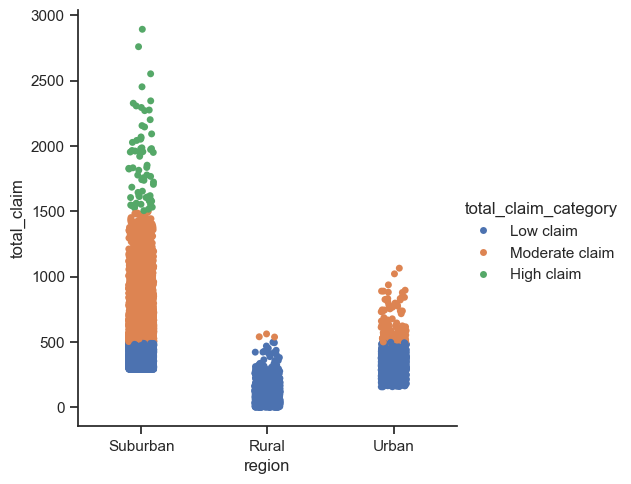

In [100]:
# Create a categorical plot in seaborn using the claim created above

sns.set(style="ticks")
g = sns.catplot(x="region", y="total_claim", hue="total_claim_category", data=df)
plt.show()

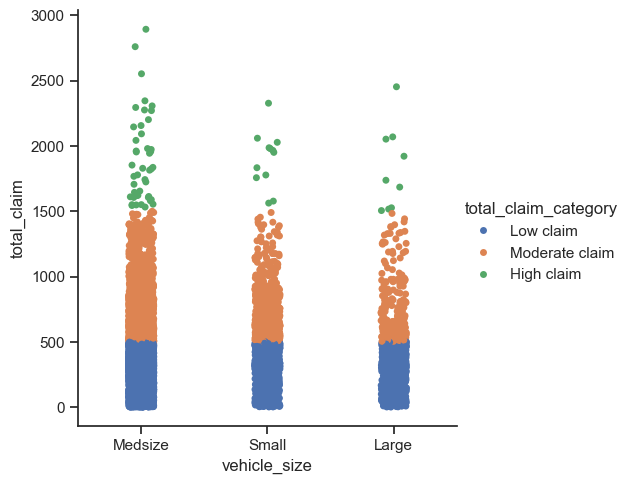

In [102]:
# Create a categorical plot in seaborn using the claim created above

sns.set(style="ticks")
g = sns.catplot(x="vehicle_size", y="total_claim", hue="total_claim_category", data=df)
plt.show()

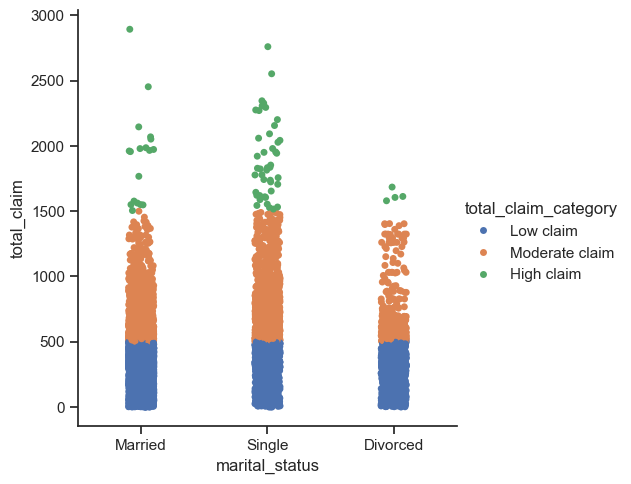

In [106]:
# Create a categorical plot in seaborn using the claim created above

sns.set(style="ticks")
g = sns.catplot(x="marital_status", y="total_claim", hue="total_claim_category", data=df)
plt.show()

In [376]:
# fig = g.get_figure()
plt.savefig(os.path.join(path, 'Visuals', 'categorical_plot_out.png')) 

# Again, the image will be saved in the working directory. 

## Answering questions:

##### Through the visual produced here, I was able to answer a few questions drafted in Exercise 6.1. First, I find that the married people do have a few high claim compared to singles. 

##### Additionally, I find that there is a strong relationship between monthly premium and the total claim. 

## Questions to add based on the current visuals

##### 1. Examine the relationship between total claim and monthly premium paid.
##### 2. How does income influence the total claim?

## Hypotheses

##### H1: Increase in the monthly premium paid increase the total claims of the customers.
##### H2: Higher the number of policies opted in by the customer increases the response to the marketing calls positively.
##### H3: Martial status have a significant impact on the total claims by the customers, where married people do claim less compared to singles.